<a href="https://colab.research.google.com/github/sanamsabooni/ML_LinearRegression_GradientDescent/blob/main/Simple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [5]:
#Simulating data
n=1000
x = np.random.normal(3,5, size = n)
y = -15 * x + 20 +np.random.normal(0,3, size = n)

In [3]:
print(y)

[-5.86434029e+01 -5.17315156e+01  1.52094566e+02  2.86645956e+01
 -5.25179071e+01 -2.12467077e+01 -6.56065921e+01 -7.79890004e+01
  7.28644325e+00  1.18546116e+01  7.84832026e+01  4.39643572e+01
 -6.18564350e+01 -2.19564043e+01 -8.12844871e+01 -1.14241080e+01
 -6.20882628e+00  7.32114506e+01 -1.04033956e+02 -1.80439223e+02
  1.65864650e+01 -9.30745611e+01 -5.41931228e+01 -1.43417411e+01
 -1.84808288e+02 -4.91796029e+01 -2.55303916e+01 -8.42921286e+01
  1.09261608e+02 -1.05564880e+02 -9.28337018e+01 -3.80209691e+01
 -4.71913945e+01 -9.71600802e+01 -6.19910232e+01  1.32106336e+02
 -6.03680355e+01 -8.63431983e+01 -1.19421894e+01 -4.10094377e+01
 -2.58316056e+01  3.76121033e+01 -5.68766569e+01 -1.44325383e+02
 -5.73668742e+01 -1.33344237e+02 -1.02312147e+02  7.64922911e+01
 -5.71091028e+01  8.49280254e+01  5.95472862e+01  1.48142444e+01
  5.97428863e+01 -6.20637445e+01 -2.04705353e+01  5.98564658e+01
 -5.42181801e+01 -1.73450712e+02 -2.83795725e+01 -6.63107654e+01
 -3.84167572e+00  1.56013

In [8]:
#Analytical approach for solving linear regression
X = np.sum(x)
Y = np.sum(y)
b1  = (n*np.dot(x,y) - Y*X) / (n*np.dot(x,x)-X**2)
b0 = (Y-b1*X)/n
b1, b0 = round(b1,2), round(b0,2)
print(f"y = {b1} x + {b0}")

y = -15.01 x + 20.21


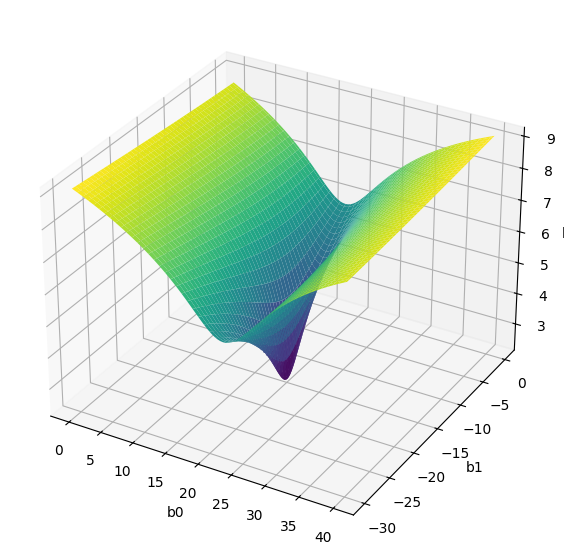

In [9]:
def MSE_loss(b0,b1,x,y):
  pred = b0 + b1 * x
  loss = np.sum((pred - y)**2) / len(y)
  return loss

#generate a grid of b0 and b1values around the real b0=20 and b1=-15
b0_vals = np.linspace(0,40,100)
b1_vals = np.linspace(-30,0,100)

#calculate MSE loss for each point of this grid
#log-scale is used only for better visualization
Z = np.zeros((len(b0_vals),len(b1_vals)))
for i in range(len(b0_vals)):
  for j in range(len(b1_vals)):
    Z[i,j] = np.log(MSE_loss(b0_vals[i],b1_vals[j],x,y))

#3D plot ofMSE loss in log-scale
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
B0, B1 = np.meshgrid(b0_vals, b1_vals)
ax.plot_surface(B0, B1, Z, cmap='viridis')

#adding labels
ax.set_xlabel('b0')
ax.set_ylabel('b1')
ax.set_zlabel('loss')
plt.show()